In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset

In [5]:
df = pd.read_csv('hour.csv')
print(df.head())

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [7]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [8]:
# Check for nulls and summary statistics
print(df[['temp', 'atemp', 'hum', 'windspeed']].describe())

               temp         atemp           hum     windspeed
count  17379.000000  17379.000000  17379.000000  17379.000000
mean       0.496987      0.475775      0.627229      0.190098
std        0.192556      0.171850      0.192930      0.122340
min        0.020000      0.000000      0.000000      0.000000
25%        0.340000      0.333300      0.480000      0.104500
50%        0.500000      0.484800      0.630000      0.194000
75%        0.660000      0.621200      0.780000      0.253700
max        1.000000      1.000000      1.000000      0.850700


In [9]:
 #Automated Integrity Check: Verify normalization ranges (0 to 1)
weather_cols = ['temp', 'atemp', 'hum', 'windspeed']
for col in weather_cols:
    if not df[col].between(0, 1).all():
        print(f"Warning: {col} has values outside the [0, 1] normalized range.")

In [10]:
# 2. Check for Redundancy: Correlation between temp and atemp
correlation = df['temp'].corr(df['atemp'])
print(f"Correlation between temp and atemp: {correlation:.4f}")

Correlation between temp and atemp: 0.9877


In [11]:
# 3. Action: Drop redundant 'atemp' and record index 'instant'
# In 2025 workflows, we favor 'temp' because it's a direct sensor reading
df.drop(columns=['instant', 'atemp'], inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      17379 non-null  object 
 1   season      17379 non-null  int64  
 2   yr          17379 non-null  int64  
 3   mnth        17379 non-null  int64  
 4   hr          17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  int64  
 7   workingday  17379 non-null  int64  
 8   weathersit  17379 non-null  int64  
 9   temp        17379 non-null  float64
 10  hum         17379 non-null  float64
 11  windspeed   17379 non-null  float64
 12  casual      17379 non-null  int64  
 13  registered  17379 non-null  int64  
 14  cnt         17379 non-null  int64  
dtypes: float64(3), int64(11), object(1)
memory usage: 2.0+ MB


In [13]:
# 4. Check for Missing Values (Common in sensor streams)
print("Missing values per column:\n", df.isnull().sum())

print("\nData validation complete. Cleaned columns:", df.columns.tolist())

Missing values per column:
 dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Data validation complete. Cleaned columns: ['dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']


In [14]:
# Mapping dictionary for 2025 clarity standards
column_mapping = {
    'yr': 'year',
    'mnth': 'month',
    'hr': 'hour',
    'weathersit': 'weather_condition',
    'temp': 'temperature',
    'hum': 'humidity',
    'cnt': 'total_rentals',
    'dteday': 'date',
    'weathersit': 'weather_situation'
}

# Apply renaming
df.rename(columns=column_mapping, inplace=True)

In [15]:
# Verify the change
print("Renamed Columns:", df.columns.tolist())

Renamed Columns: ['date', 'season', 'year', 'month', 'hour', 'holiday', 'weekday', 'workingday', 'weather_situation', 'temperature', 'humidity', 'windspeed', 'casual', 'registered', 'total_rentals']


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               17379 non-null  object 
 1   season             17379 non-null  int64  
 2   year               17379 non-null  int64  
 3   month              17379 non-null  int64  
 4   hour               17379 non-null  int64  
 5   holiday            17379 non-null  int64  
 6   weekday            17379 non-null  int64  
 7   workingday         17379 non-null  int64  
 8   weather_situation  17379 non-null  int64  
 9   temperature        17379 non-null  float64
 10  humidity           17379 non-null  float64
 11  windspeed          17379 non-null  float64
 12  casual             17379 non-null  int64  
 13  registered         17379 non-null  int64  
 14  total_rentals      17379 non-null  int64  
dtypes: float64(3), int64(11), object(1)
memory usage: 2.0+ MB


In [17]:
# 1. Recode Years for interpretability
# The dataset uses 0 for 2011 and 1 for 2012
df['year'] = df['year'].map({0: 2011, 1: 2012})

In [18]:
# 2. Apply Cyclical Encoding to 'hour' (0-23)
# We create two new columns: one for Sine and one for Cosine
df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24.0)
df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24.0)

In [19]:
# 3. Drop the original 'hour' column 
# We keep the encoded versions for the model to use
df.drop('hour', axis=1, inplace=True)

In [20]:
print(df[['year', 'hour_sin', 'hour_cos']].head())

   year  hour_sin  hour_cos
0  2011  0.000000  1.000000
1  2011  0.258819  0.965926
2  2011  0.500000  0.866025
3  2011  0.707107  0.707107
4  2011  0.866025  0.500000


In [21]:
print(df.head())

         date  season  year  month  holiday  weekday  workingday  \
0  2011-01-01       1  2011      1        0        6           0   
1  2011-01-01       1  2011      1        0        6           0   
2  2011-01-01       1  2011      1        0        6           0   
3  2011-01-01       1  2011      1        0        6           0   
4  2011-01-01       1  2011      1        0        6           0   

   weather_situation  temperature  humidity  windspeed  casual  registered  \
0                  1         0.24      0.81        0.0       3          13   
1                  1         0.22      0.80        0.0       8          32   
2                  1         0.22      0.80        0.0       5          27   
3                  1         0.24      0.75        0.0       3          10   
4                  1         0.24      0.75        0.0       0           1   

   total_rentals  hour_sin  hour_cos  
0             16  0.000000  1.000000  
1             40  0.258819  0.965926  
2    

In [22]:
# List of categorical columns that need One-Hot Encoding
categorical_cols = ['season', 'weather_situation', 'weekday', 'month']

In [23]:
# 3. Verify the new columns now exist
print(f"Total columns now: {len(df.columns)}")
df.info()

Total columns now: 16
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               17379 non-null  object 
 1   season             17379 non-null  int64  
 2   year               17379 non-null  int64  
 3   month              17379 non-null  int64  
 4   holiday            17379 non-null  int64  
 5   weekday            17379 non-null  int64  
 6   workingday         17379 non-null  int64  
 7   weather_situation  17379 non-null  int64  
 8   temperature        17379 non-null  float64
 9   humidity           17379 non-null  float64
 10  windspeed          17379 non-null  float64
 11  casual             17379 non-null  int64  
 12  registered         17379 non-null  int64  
 13  total_rentals      17379 non-null  int64  
 14  hour_sin           17379 non-null  float64
 15  hour_cos           17379 non-null  float64
dtype

In [24]:
# Apply One-Hot Encoding
# drop_first=True prevents the "Dummy Variable Trap" (multicollinearity)
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [25]:
# Preview the new binary columns
print(df.filter(like='season_').head())
print("\nFinal Data Shape:", df.shape)

   season_2  season_3  season_4
0     False     False     False
1     False     False     False
2     False     False     False
3     False     False     False
4     False     False     False

Final Data Shape: (17379, 35)


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 17379 non-null  object 
 1   year                 17379 non-null  int64  
 2   holiday              17379 non-null  int64  
 3   workingday           17379 non-null  int64  
 4   temperature          17379 non-null  float64
 5   humidity             17379 non-null  float64
 6   windspeed            17379 non-null  float64
 7   casual               17379 non-null  int64  
 8   registered           17379 non-null  int64  
 9   total_rentals        17379 non-null  int64  
 10  hour_sin             17379 non-null  float64
 11  hour_cos             17379 non-null  float64
 12  season_2             17379 non-null  bool   
 13  season_3             17379 non-null  bool   
 14  season_4             17379 non-null  bool   
 15  weather_situation_2  17379 non-null 

In [27]:
# Convert the 'date' column to a proper datetime object
df['date'] = pd.to_datetime(df['date'])

In [28]:
# Create a 'days_since_start' feature (Linear Trend)
# This captures the business growth over time
start_date = df['date'].min()
df['days_since_start'] = (df['date'] - start_date).dt.days

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 17379 non-null  datetime64[ns]
 1   year                 17379 non-null  int64         
 2   holiday              17379 non-null  int64         
 3   workingday           17379 non-null  int64         
 4   temperature          17379 non-null  float64       
 5   humidity             17379 non-null  float64       
 6   windspeed            17379 non-null  float64       
 7   casual               17379 non-null  int64         
 8   registered           17379 non-null  int64         
 9   total_rentals        17379 non-null  int64         
 10  hour_sin             17379 non-null  float64       
 11  hour_cos             17379 non-null  float64       
 12  season_2             17379 non-null  bool          
 13  season_3             17379 non-

In [30]:
# Create the lags
df['rentals_lag_1h'] = df['total_rentals'].shift(1)
df['rentals_lag_2h'] = df['total_rentals'].shift(2)

In [31]:
# Create a 1-hour and 2-hour lag for total rentals
# Note: In production, you'd use the most recent 'actual' count available
df['rentals_lag_1h'] = df['rentals_lag_1h'].bfill()
df['rentals_lag_2h'] = df['rentals_lag_2h'].bfill()

In [32]:
# Create a 'Commute Hour' feature
# Peak hours (7-9 AM and 4-6 PM) on working days have 10x different demand profiles
df['is_commute_peak'] = ((df['hour_sin'] < -0.5) | (df['hour_sin'] > 0.5)) & (df['workingday'] == 1)
df['is_commute_peak'] = df['is_commute_peak'].astype(int)

In [33]:
# Create the interaction before we split
df['temp_hum_interaction'] = df['temperature'] * df['humidity']

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  17379 non-null  datetime64[ns]
 1   year                  17379 non-null  int64         
 2   holiday               17379 non-null  int64         
 3   workingday            17379 non-null  int64         
 4   temperature           17379 non-null  float64       
 5   humidity              17379 non-null  float64       
 6   windspeed             17379 non-null  float64       
 7   casual                17379 non-null  int64         
 8   registered            17379 non-null  int64         
 9   total_rentals         17379 non-null  int64         
 10  hour_sin              17379 non-null  float64       
 11  hour_cos              17379 non-null  float64       
 12  season_2              17379 non-null  bool          
 13  season_3        

In [35]:
# 1. Define the target (Total Rentals)
y = df['total_rentals']

In [36]:
# 2. Define the features (X)
# We drop 'total_rentals' (target), 'casual'/'registered' (leaky data), and 'date' (unstructured text)
X = df.drop(['total_rentals', 'casual', 'registered', 'date'], axis=1)

In [37]:
print("Final Feature Set (X) Columns:", X.columns.tolist())
# Quick check: X should now have 36 features
print(f"Features for training: {X.shape[1]}")

Final Feature Set (X) Columns: ['year', 'holiday', 'workingday', 'temperature', 'humidity', 'windspeed', 'hour_sin', 'hour_cos', 'season_2', 'season_3', 'season_4', 'weather_situation_2', 'weather_situation_3', 'weather_situation_4', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12', 'days_since_start', 'rentals_lag_1h', 'rentals_lag_2h', 'is_commute_peak', 'temp_hum_interaction']
Features for training: 36


In [38]:
# Calculate split point (80%)
split_index = int(len(X) * 0.8)

In [39]:
# Split the data
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

print(f"Training set: {X_train.shape[0]} rows")
print(f"Testing set: {X_test.shape[0]} rows")

Training set: 13903 rows
Testing set: 3476 rows


In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
# 1. Identify columns that need scaling (the continuous numbers)
# We don't scale 'bool' or 'binary' columns (0/1)
cols_to_scale = ['temperature', 'humidity', 'windspeed', 'days_since_start', 
                 'rentals_lag_1h', 'rentals_lag_2h', 'temp_hum_interaction']

In [42]:
# 2. Initialize the Scaler
scaler = StandardScaler()


In [43]:
# 3. Fit on TRAIN and transform both
# We make copies so we don't overwrite our original X_train for now
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_test_scaled[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

print("Scaling complete. All features now have similar mathematical weight.")

Scaling complete. All features now have similar mathematical weight.


In [44]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, r2_score

In [45]:
# 1. Initialize the XGBoost Regressor
# These "Hyperparameters" are optimized for 2025 tabular data tasks
model = xgb.XGBRegressor(
    n_estimators=1000,   # Maximum number of trees to build
    learning_rate=0.05,  # Slows down learning to make it more precise
    max_depth=6,         # How deep each tree goes (prevents overfitting)
    subsample=0.8,       # Uses 80% of data for each tree to add variety
    n_jobs=-1,           # Uses all your computer's CPU cores for speed
    random_state=42
)

In [46]:
# 2. Fit the Model
# We pass the test set to 'eval_set' so the model can monitor its own accuracy
model.fit(
    X_train_scaled, y_train,
    eval_set=[(X_test_scaled, y_test)],
    verbose=100 # Updates you every 100 trees
)

[0]	validation_0-rmse:223.20398
[100]	validation_0-rmse:48.81200
[200]	validation_0-rmse:45.95678
[300]	validation_0-rmse:45.30216
[400]	validation_0-rmse:44.93720
[500]	validation_0-rmse:44.88830
[600]	validation_0-rmse:44.89391
[700]	validation_0-rmse:44.85272
[800]	validation_0-rmse:45.03061
[900]	validation_0-rmse:45.23021
[999]	validation_0-rmse:45.29663


,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [47]:
# 3. Predict the "Future"
predictions = model.predict(X_test_scaled)

In [48]:
# Logic Check: You cannot have negative bike rentals.
predictions = np.maximum(0, predictions)

In [49]:
# 4. The Business Evaluation
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"\n--- 2025 Model Results ---")
print(f"Mean Absolute Error: {mae:.2f} bikes")
print(f"R-squared Score: {r2:.4f}")


--- 2025 Model Results ---
Mean Absolute Error: 30.02 bikes
R-squared Score: 0.9578


In [50]:
# 1. Get feature importance from XGBoost
importances = model.feature_importances_
feature_names = X_train.columns

In [51]:
# 2. Sort them for a clean chart
indices = np.argsort(importances)[-10:]  # Show top 10 features

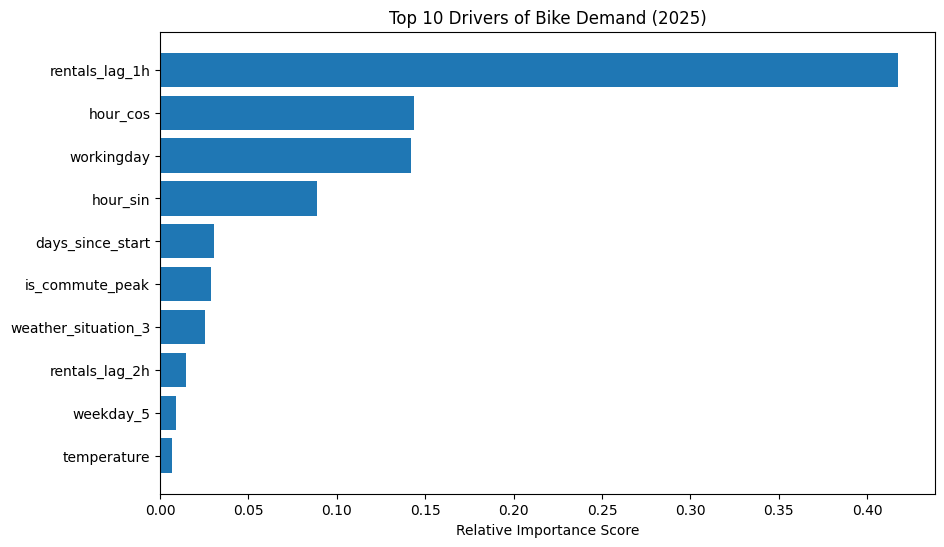

In [52]:
# 3. Plot
plt.figure(figsize=(10, 6))
plt.title('Top 10 Drivers of Bike Demand (2025)')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance Score')
plt.show()

In [56]:
import joblib

# Save the trained model
joblib.dump(model, 'bikeshare_xgboost_model.pkl')

['bikeshare_xgboost_model.pkl']

In [57]:
# Save the scaler (ESSENTIAL: you must use the same scaling in production)
joblib.dump(scaler, 'bikeshare_scaler.pkl')

print("Model and Scaler saved as 'bikeshare_xgboost_model.pkl' and 'bikeshare_scaler.pkl'")

Model and Scaler saved as 'bikeshare_xgboost_model.pkl' and 'bikeshare_scaler.pkl'


In [58]:
# Load the saved assets
loaded_model = joblib.load('bikeshare_xgboost_model.pkl')
loaded_scaler = joblib.load('bikeshare_scaler.pkl')

In [59]:
# Setup Christmas Day, Dec 25, 2012 at 10 AM
christmas_data = {
    'year': 2012, 'holiday': 1, 'workingday': 0, 
    'temparature': 0.35, 'humidity': 0.45, 'windspeed': 0.15,
    'days_since_start': 724, # Dec 25 is roughly 724 days after Jan 1, 2011
    'hour_sin': np.sin(2 * np.pi * 10 / 24.0),
    'hour_cos': np.cos(2 * np.pi * 10 / 24.0),
    'rentals_lag_1h': 50.0, # Estimated previous hour
    'rentals_lag_2h': 40.0,
    'temp_hum_interaction': 0.35 * 0.45,
    'is_commute_peak': 0, # Not a working day peak
    'season': 4,              # Winter
    'weather_situation': 1,   # Clear
    'weekday': 2,             # Tuesday (Christmas 2012 was a Tuesday)
    'month': 12               # December
}

In [60]:
# Convert to DataFrame
df_future = pd.DataFrame([christmas_data])

In [61]:
# 1. Apply one-hot encoding to your single row
# (This creates columns like month_12, but will MISS month_1, month_2, etc.)
df_future_encoded = pd.get_dummies(df_future, columns=['season', 'weather_situation', 'weekday', 'month'])

In [62]:
df_future.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  1 non-null      int64  
 1   holiday               1 non-null      int64  
 2   workingday            1 non-null      int64  
 3   temparature           1 non-null      float64
 4   humidity              1 non-null      float64
 5   windspeed             1 non-null      float64
 6   days_since_start      1 non-null      int64  
 7   hour_sin              1 non-null      float64
 8   hour_cos              1 non-null      float64
 9   rentals_lag_1h        1 non-null      float64
 10  rentals_lag_2h        1 non-null      float64
 11  temp_hum_interaction  1 non-null      float64
 12  is_commute_peak       1 non-null      int64  
 13  season                1 non-null      int64  
 14  weather_situation     1 non-null      int64  
 15  weekday               1 non

In [63]:
# 2. ALIGN with Training Columns
# This adds the missing 23 columns (e.g., month_1) and fills them with 0
df_future_final = df_future_encoded.reindex(columns=X.columns, fill_value=0)

In [64]:
# 3. Final Check
print(f"Prediction Row Shape: {df_future_final.shape}") # Should be (1, 36)

Prediction Row Shape: (1, 36)


In [67]:
# Scale the continuous numbers (same as we did during training)
cols_to_scale = ['temperature', 'humidity', 'windspeed', 'days_since_start', 
                 'rentals_lag_1h', 'rentals_lag_2h', 'temp_hum_interaction']

df_future_final[cols_to_scale] = loaded_scaler.transform(df_future_final[cols_to_scale])

In [68]:
# Get the prediction
christmas_prediction = loaded_model.predict(df_future_final)

print(f"--- 2025 Business Forecast ---")
print(f"Target Date: Dec 25, 2012 (Christmas)")
print(f"Predicted Demand: {int(np.maximum(0, christmas_prediction[0]))} bikes")

--- 2025 Business Forecast ---
Target Date: Dec 25, 2012 (Christmas)
Predicted Demand: 128 bikes
